In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import numpy as np
import os
from torchsummary import summary

## Dataset count

In [ ]:
ORIGINAL_DATA_DIR = "../original_data/train/"
AUG_DATA_DIR = "../aug_data_new/train/"

original_data_count = {}
aug_data_count = {}

for root, dirs, files in os.walk(ORIGINAL_DATA_DIR):
    if len(files):
        original_data_count[root.split("/")[-1]] = len(files)

for root, dirs, files in os.walk(AUG_DATA_DIR):
    if len(files):
        aug_data_count[root.split("/")[-1]] = len(files)

# sorting for plotting 
original_data_count = {key: value for key, value in sorted(original_data_count.items())}
aug_data_count = {key: value for key, value in sorted(aug_data_count.items())}

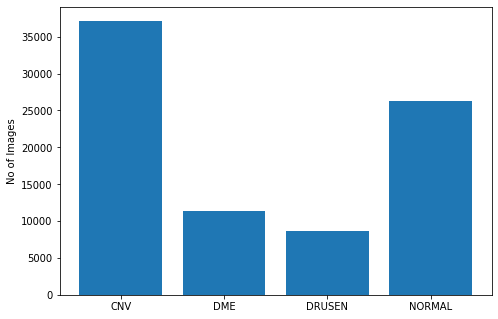

In [27]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(original_data_count.keys(), original_data_count.values())
ax.set_ylabel("No of Images")
plt.show()

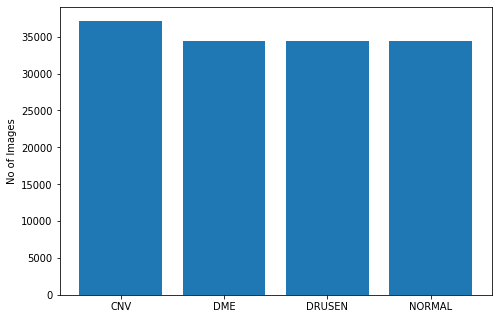

In [28]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(aug_data_count.keys(), aug_data_count.values())
ax.set_ylabel("No of Images")
plt.show()

## Event logs

### Real dataset

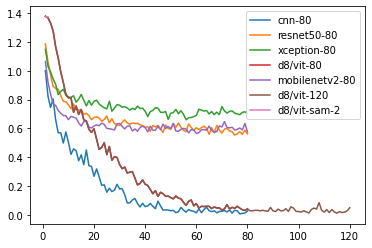

In [2]:
def get_logs(log_dir):
    event_accumulator = EventAccumulator(log_dir)
    event_accumulator.Reload()
    try:
        events = event_accumulator.Scalars("Train_Loss")
    except:
        events = event_accumulator.Scalars("Vit_Loss")

    logs = {x.step : x.value for x in events}
    # x = [x.step for x in events]
    # y = [x.value for x in events]
    # df = pd.DataFrame({"step": logs.keys(), "train_loss": logs.values()})
    # df.to_csv("train_loss.csv")
    # print(df)
    return logs.keys(), logs.values()

# model_trained = ["cnn-80", "resnet50-80", "xception-80", "d8/vit-80", "mobilenetv2-80", "d8/vit-120", "d8/vit-sam-2"]
model_trained = ["d8/vit-sam-2"]

log_dirs_ls = [f'./runs/{x}' for x in model_trained]

for log_dir in log_dirs_ls:
    x,y = get_logs(log_dir)
    plt.plot(x,y)
plt.legend(model_trained)
plt.show()

### Augmented dataset

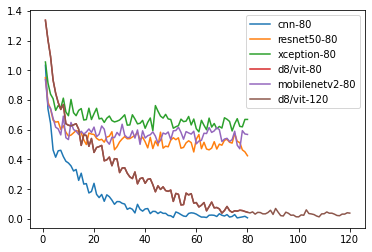

In [126]:
model_trained = ["cnn-80", "resnet50-80", "xception-80", "d8/vit-80", "mobilenetv2-80", "d8/vit-120"]
log_dirs_ls = [f'../scripts_aug/runs/{x}' for x in model_trained]

for log_dir in log_dirs_ls:
    x,y = get_logs(log_dir)
    plt.plot(x,y)
plt.legend(model_trained)
plt.show()

## Performance metrics

### Real dataset

In [116]:
results = pd.read_csv("./analysis/results.csv")
results

,f1_score,precision,recall,support,accuracy,model,epoch,params
0,0.891918,0.891936,0.892,NaN,89.200005,resnet50-80,80,23516228
1,0.901422,0.902917,0.902,NaN,90.200005,mobilenetv2-80,80,2228996
2,0.986964,0.987101,0.987,NaN,98.700005,cnn-80,80,3541000
3,0.909842,0.912469,0.910,NaN,91.000008,vit-25x150-80,80,1306628
4,0.881668,0.881925,0.882,NaN,88.200005,xception-80,80,20815148
5,0.157671,0.147146,0.273,NaN,27.300001,vit-25x150-1,1,1306628
6,0.966956,0.967940,0.967,NaN,96.700005,vit-25x150-80,80,1306628
7,0.209187,0.157475,0.314,NaN,31.400002,vit-sam-25x150-1,1,1306628
8,0.973974,0.974740,0.974,NaN,97.400002,vit-25x150-120,120,1306628


### Augmented dataset

In [127]:
results = pd.read_csv("../scripts_aug/analysis/results.csv")
results

,f1_score,precision,recall,support,accuracy,model,epoch,params
0,0.891829,0.899781,0.893,NaN,89.300003,resnet50-80,80,23516228
1,0.995000,0.995012,0.995,NaN,99.500008,cnn-80,80,3541000
2,0.967951,0.968722,0.968,NaN,96.800003,vit-d8-25x150-80,80,1306628
3,0.826230,0.848197,0.830,NaN,83.000008,xception-80,80,20815148
4,0.847364,0.857084,0.849,NaN,84.900002,xception-80,80,20815148
5,0.879502,0.891977,0.882,NaN,88.200005,mobilenetv2-80,80,2228996
6,0.169393,0.129091,0.267,NaN,26.700001,vit-sam-25x150-1,1,1306628
7,0.966928,0.968209,0.967,NaN,96.700005,vit-25x150-120,120,1306628
